### Description

In this notebook we are implementing a Naive Bayes classifier for text data analysis with the purpose of identifying how many stars a review has based on the review text. A kagle dataset with 500000 amazon reviews is being used. In this example, we archieve an aqquaracy of 53% when training the model with 150000 reviews in google colab. One of the reasons is that stars are not totally correlated with the message text, which makes generalizing this knowledge pretty difficult

### Dependencies

In [5]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelBinarizer
import re
from matplotlib import pyplot as plt

### Cleaning data

In [3]:
dataset = pd.read_csv("../data/Reviews.csv")

dataset = dataset[["Score","Summary","Text"]]
balanced_data = pd.DataFrame()

if all(dataset["Score"].value_counts()>= 10000):

    for score in range(1,6):
        score_df = dataset[dataset["Score"]== score].sample(n=2000,random_state=1)
        balanced_data = pd.concat([balanced_data,score_df])
        

    rest_data = dataset.drop(balanced_data.index).reset_index(drop=True)

    balanced_data.reset_index(drop=True,inplace=True)


balanced_data.head(20)

Score                              Summary  \
0       1                      Absolutely Vile   
1       1                   Weight Discrepancy   
2       1              Not like at the stadium   
3       1      Inconsistent in product quality   
4       1                  out of date product   
5       1  They Only Ship One 8oz Pack, BEWARE   
6       1     Don't be tempted by the price...   
7       1                              Dislike   
8       1    Canned, not dry.  Arrived damaged   
9       1                   Not worth the risk   
10      1             My Pop Chips were rancid   
11      1               little redeeming value   
12      1               price is way too high!   
13      1                                YUCK!   
14      1                           Horrible !   
15      1                      Bags split open   
16      1                             Ovaltine   
17      1      Sorry, this drink is really bad   
18      1                     Wrong everything   
19      1      Only buy if you love ORANGE tea   

                                                 Text  
0   I just tried this product for the first time t...  
1   The description of this item is utterly mislea...  
2   I was so disappointed that I threw them all ou...  
3   This is my fist batch from amazon of the salmo...  
4   when i received this product it was already ou...  
5   It says that you will receive two 8oz packages...  
6   The new price is very attractive. However, it ...  
7   I usually don't write reviews much but I reall...  
8   These are large cans of beans, not dry beans l...  
9   Expiration on packaging says 10/02/12 and toda...  
10  I have ordered my Pop Chips from Amazon for mo...  
11  Unless you're starving on the verge of death, ...  
12  The price from 911drugstore is crazy!  If you ...  
13  I saw that these cookies were made by Nabisco,...  
14  I don't understand how anybody could think tha...  
15  Several of the rolls of bags were defective, s...  
16  As far as I know Ovaltine is a great product w...  
17  I thought because I love margaritas this might...  
18  I ordered these thinking I would get the all n...  
19  Chocolate?  The strongest flavor of this tea -...

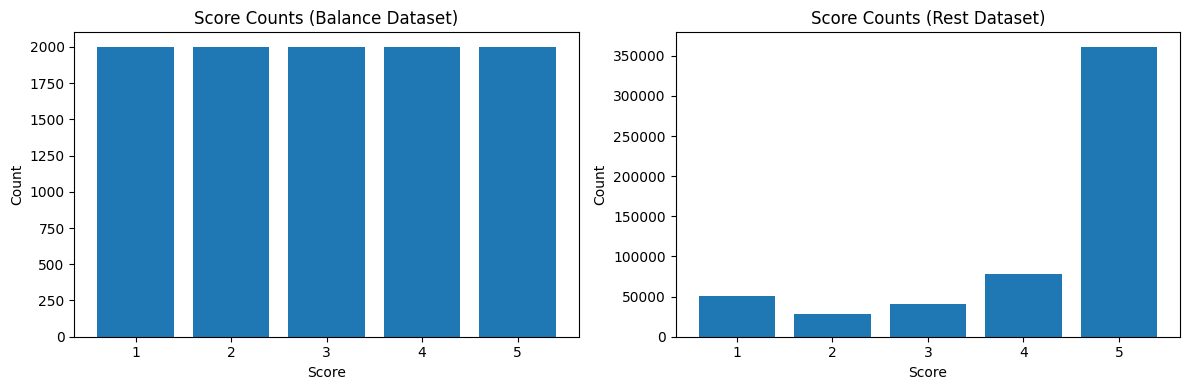

In [43]:
# Count the number of scores for each class in both datasets
score_counts = balanced_data['Score'].value_counts().sort_index()
score_counts2 = rest_data['Score'].value_counts().sort_index()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Plot the first bar chart in the first subplot
ax1.bar(score_counts.index, score_counts.values)
ax1.set_xlabel("Score")
ax1.set_ylabel("Count")
ax1.set_title("Score Counts (Balance Dataset)")

# Plot the second bar chart in the second subplot
ax2.bar(score_counts2.index, score_counts2.values)
ax2.set_xlabel("Score")
ax2.set_ylabel("Count")
ax2.set_title("Score Counts (Rest Dataset)")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [4]:
def text_clean(text):
    text = text.str.lower()
    text = text.replace(r"<.*>|[^a-zA-Z0-9\s]","",regex=True)
    text = text.replace(r'\d+\S*',"",regex=True)
    text = text.replace(r"\s+", " ",regex=True)
    return text


balanced_data["Summary"] = text_clean(balanced_data["Summary"])
balanced_data["Text"] = text_clean(balanced_data["Text"])
rest_data["Summary"] = text_clean(rest_data["Summary"])
rest_data["Text"] = text_clean(rest_data["Text"])


dataset.to_csv('reviews.csv', index=False)


# balanced_data.head(20)

In [46]:
train_x, test_x, train_y, test_y = train_test_split(balanced_data["Text"],balanced_data["Score"],test_size=0.2,random_state=8)

In [47]:
cnt_vec = CountVectorizer(stop_words="english")
#BOW = Bag Of Words
BOW_train = cnt_vec.fit_transform(train_x).toarray()
BOW_train_Df = pd.DataFrame(BOW_train,columns=cnt_vec.get_feature_names_out())
BOW_train_Df.head(20)


BOW_train_Df[:4]

aa  aaaaaahhhhh  aachen  aakg  abad  abandoned  abc  abctoy  abd  \
0   0            0       0     0     0          0    0       0    0   
1   0            0       0     0     0          0    0       0    0   
2   0            0       0     0     0          0    0       0    0   
3   0            0       0     0     0          0    0       0    0   

   aberration  ...  ziptop  ziwipeak  zoe  zojirushi  zone  zoo  zoomed  \
0           0  ...       0         0    0          0     0    0       0   
1           0  ...       0         0    0          0     0    0       0   
2           0  ...       0         0    0          0     0    0       0   
3           0  ...       0         0    0          0     0    0       0   

   zucchini  zukes  zukess  
0         0      0       0  
1         0      0       0  
2         0      0       0  
3         0      0       0  

[4 rows x 19534 columns]

In [48]:
BOW_test = cnt_vec.transform(test_x).toarray()
BOW_test_Df = pd.DataFrame(BOW_test,columns = cnt_vec.get_feature_names_out())
BOW_test_Df[:4]


aa  aaaaaahhhhh  aachen  aakg  abad  abandoned  abc  abctoy  abd  \
0   0            0       0     0     0          0    0       0    0   
1   0            0       0     0     0          0    0       0    0   
2   0            0       0     0     0          0    0       0    0   
3   0            0       0     0     0          0    0       0    0   

   aberration  ...  ziptop  ziwipeak  zoe  zojirushi  zone  zoo  zoomed  \
0           0  ...       0         0    0          0     0    0       0   
1           0  ...       0         0    0          0     0    0       0   
2           0  ...       0         0    0          0     0    0       0   
3           0  ...       0         0    0          0     0    0       0   

   zucchini  zukes  zukess  
0         0      0       0  
1         0      0       0  
2         0      0       0  
3         0      0       0  

[4 rows x 19534 columns]

In [49]:
BOW_test_Df["Score"] = test_y.reset_index()["Score"]
BOW_train_Df["Score"] = train_y.reset_index()["Score"]

In [50]:
filtered_df = balanced_data[balanced_data['Text'].str.contains('count', na=False)]
pd.set_option('display.max_colwidth', None)

filtered_df.head()

Score                                          Summary  \
28       1                                            uhhhh   
64       1  the cat the dog nor the grackles would touch it   
77       1                                   way overpriced   
100      1                                       frustrated   
125      1                          great smell brown water   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Text  
28                                                                                                                                                                                                                                                                        my younger dog has gotten bored lately and chewing anything she can get ahold of in our shed i went out last night in an attempt to find something that will keep her occupied for i bought this took it home and had hope for about minutes she got the treat out and i messed up by pushing it in too hard and getting it stuck in between the sides in theory this was the most amount of time the toy went without having the treat popped out after she licked at that for a while i was able to push the treat out and get it back to the place that it belonged pop pop pop she is now a pro treat grabber who can get these everlasting discs out within seconds flat if you dont count the time she sniffed at it now i have a ball to play fetch with  
64   i bought a can of this for the novelty of seeing how my cat would react to a can of cat food that cost almost a buck fifty hes normally not a picky eater and routinely eats canned friskies or i opened the can and placed the contents into a clean feeding bowl and presented it to him in his normal feeding place on the counter up away from the dog he took a sniff and recoiled from it i then offered him a can of his regular food that he happily ate well that didnt go well so i then offered it to our labgolden mix a dog that loves nothing more than snapping up the cats food if it is left within her reach one sniff and she jerked her head back from it and walked away next step was to fling it out into the back yard where the grackles an omnivorous bird common to south texas scavenge for moldy bread pizza bones stale chips and pretty much anything else we toss out nope the grackles wouldnt touch it either but the fire ants love it they are all over it and within a few days it will be gone  
77                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [51]:
#for each score count the frequency of each word
cons_df = BOW_train_Df.groupby("Score",as_index=False).sum().reset_index(drop=True)
#count the frequencies of each score

category_count_df = BOW_train_Df["Score"].value_counts().reset_index()
category_count_df.columns = ["Score", "Score_Count"]


cons_df = pd.merge(cons_df,category_count_df,on="Score",how="left")

cons_df["sum_all_words"] = cons_df.drop(["Score","Score_Count"],axis=1).sum(axis=1)

cons_df.head(10)

Score  aa  aaaaaahhhhh  aachen  aakg  abad  abandoned  abc  abctoy  abd  \
0      1   0            0       1     0     1          1    0       1    0   
1      2   0            1       0     0     0          3    0       0    0   
2      3   0            0       0     0     0          0    0       0    0   
3      4   3            0       0     0     0          0    2       0    0   
4      5   2            0       0     1     0          0    0       0    1   

   ...  zoe  zojirushi  zone  zoo  zoomed  zucchini  zukes  zukess  \
0  ...    0          0     0    0       0         0      5       0   
1  ...    0          0     0    0       0         1      4       0   
2  ...    2          0     2    0       0         1      5       0   
3  ...    2          1     0    1       1         1      4       0   
4  ...    1          0     0    0       0         1      6       1   

   Score_Count  sum_all_words  
0         1608          45902  
1         1593          50300  
2         1579          50264  
3         1630          50277  
4         1590          43788  

[5 rows x 19537 columns]

In [52]:
alpha = 1
prob_table = pd.DataFrame()

prob_table["Score"] = cons_df["Score"]
prob_table["P_S"] = np.log(cons_df["Score_Count"] / cons_df["Score_Count"].sum())

# Vectorized operation for probability calculations
cols = cons_df.columns.difference(["Score_Count", "Score", "sum_all_words"])
sum_all_words_adjusted = cons_df["sum_all_words"] + (alpha * len(cols))

# Use apply along the axis=1 to ensure correct broadcasting
prob_table[cols] = np.log((cons_df[cols].add(alpha)).div(sum_all_words_adjusted, axis=0))

prob_table.head()


C:\Users\aleja\AppData\Local\Temp\ipykernel_19024\1277165073.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prob_table[cols] = np.log((cons_df[cols].add(alpha)).div(sum_all_words_adjusted, axis=0))
C:\Users\aleja\AppData\Local\Temp\ipykernel_19024\1277165073.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prob_table[cols] = np.log((cons_df[cols].add(alpha)).div(sum_all_words_adjusted, axis=0))
C:\Users\aleja\AppData\Local\Temp\ipykernel_19024\1277165073.py:12: PerformanceWarning: DataFrame is highly fragmented.  This 

Score       P_S         aa  aaaaaahhhhh     aachen       aakg       abad  \
0      1 -1.604450 -11.088828   -11.088828 -10.395681 -11.088828 -10.395681   
1      2 -1.613823 -11.153876   -10.460729 -11.153876 -11.153876 -11.153876   
2      3 -1.622650 -11.153361   -11.153361 -11.153361 -11.153361 -11.153361   
3      4 -1.590862  -9.767253   -11.153547 -11.153547 -11.153547 -11.153547   
4      5 -1.615708  -9.957376   -11.055988 -11.055988 -10.362841 -11.055988   

   abandoned        abc     abctoy  ...     ziptop   ziwipeak        zoe  \
0 -10.395681 -11.088828 -10.395681  ... -11.088828 -11.088828 -11.088828   
1  -9.767582 -11.153876 -11.153876  ... -11.153876 -11.153876 -11.153876   
2 -11.153361 -11.153361 -11.153361  ... -11.153361 -11.153361 -10.054748   
3 -11.153547 -10.054935 -11.153547  ... -10.460400 -11.153547 -10.054935   
4 -11.055988 -11.055988 -11.055988  ... -11.055988  -9.957376 -10.362841   

   zojirushi       zone        zoo     zoomed   zucchini     zukes     zukess  
0 -11.088828 -11.088828 -11.088828 -11.088828 -11.088828 -9.297068 -11.088828  
1 -11.153876 -11.153876 -11.153876 -11.153876 -10.460729 -9.544438 -11.153876  
2 -11.153361 -10.054748 -11.153361 -11.153361 -10.460213 -9.361601 -11.153361  
3 -10.460400 -11.153547 -10.460400 -10.460400 -10.460400 -9.544109 -11.153547  
4 -11.055988 -11.055988 -11.055988 -11.055988 -10.362841 -9.110078 -10.362841  

[5 rows x 19536 columns]

In [53]:
train_array = prob_table.drop(["Score","P_S"],axis=1)
train_array = np.array(train_array)

predict_df = pd.DataFrame(np.dot(BOW_test,train_array.T) + np.array(prob_table["P_S"]),columns=["1","2","3","4","5"])

predict_df["final_category"] = predict_df.idxmax(axis=1)
predict_df["original_category"] = BOW_test_Df["Score"]
predict_df.head(20)


1            2            3            4            5  \
0   -206.080521  -205.792191  -203.732930  -204.850960  -208.129379   
1    -82.726282   -84.613533   -87.719570   -87.181145   -88.124499   
2    -81.942643   -81.203209   -82.940829   -84.873810   -88.553033   
3   -314.713844  -305.755674  -301.637139  -304.200347  -310.154117   
4   -437.217126  -445.117679  -442.930143  -445.113677  -448.172106   
5   -147.945631  -143.599246  -143.833544  -143.978589  -151.209422   
6   -107.577983  -103.370841  -104.142060  -107.253761  -111.129160   
7   -321.837371  -319.991242  -313.981594  -308.711323  -314.594185   
8   -152.290195  -153.736430  -157.462369  -161.352237  -164.615370   
9   -289.500733  -281.895672  -275.972972  -281.208740  -277.679106   
10 -1063.337408 -1063.275036 -1069.998989 -1039.191129 -1076.871417   
11  -150.209962  -147.821535  -149.458507  -148.608815  -154.156518   
12  -408.057804  -406.852335  -411.225599  -415.520517  -416.483900   
13  -130.296372  -131.247753  -127.911391  -132.192998  -135.532621   
14   -70.388819   -69.973648   -70.091244   -70.814205   -70.716180   
15  -606.679084  -595.319976  -593.968195  -588.418899  -610.023656   
16  -116.176506  -115.420589  -116.531075  -115.692516  -112.921643   
17  -318.459756  -316.335655  -319.421392  -320.507124  -329.096700   
18  -265.079847  -263.719944  -265.691836  -271.597406  -271.278143   
19  -142.694913  -140.668076  -141.244520  -137.806371  -132.456592   

   final_category  original_category  
0               3                  1  
1               1                  1  
2               2                  1  
3               3                  4  
4               1                  3  
5               2                  2  
6               2                  2  
7               4                  3  
8               1                  1  
9               3                  3  
10              4                  4  
11              2                  2  
12              2                  1  
13              3                  1  
14              2                  3  
15              4                  4  
16              5                  5  
17              2                  3  
18              2                  3  
19              5                  5

In [55]:
cross_tab_df=pd.crosstab(predict_df["final_category"], predict_df["original_category"] )
print(cross_tab_df)
print(np.trace(cross_tab_df)/cross_tab_df.values.sum())

original_category    1    2    3    4    5
final_category                            
1                  187  111   42   18   19
2                  114  129  105   43   30
3                   56  102  133   80   37
4                   24   53  118  174  129
5                   11   12   23   55  195
0.409
